# ECEN 649 COURSE PROJECT | VIOLA-JONES ALGORITHM
##### DILEEP KUMAR GUNDA | UIN: 627006688

## 2.1 Extract Haar Features (20 points)

Run blocks **Feature definitions** and **Integral Matrix** before executing below code.

In [3]:
import numpy as np
from PIL import Image

im = Image.open('dataset/trainset/faces/face00001.png')
np_im = np.array(im)
ii = integral_image(np_im)
all_features = build_features(ii.shape)

        Two Vertical:      17100
      Two Horizontal:      17100
      Three Vertical:      10830
    Three Horizontal:      10830
                Four:       8100
               Total:      63960


#### Feature definitions

In [1]:
from collections import namedtuple
Feature = namedtuple('Feature', 'type x y width height coords_x coords_y coeffs')

'''
2 rectangular sections, arranged horizontally
A | B
-1|+1
value = B - A
'''
def feature_2h(x, y, width, height):
    coords_x = [x, x+width, x, x+width,
                x+width, x+2*width, x+width, x+2*width]
    coords_y = [y, y, y+height, y+height,
               y, y, y+height, y+height]
    coeffs = [-1, 1, 1, -1,
             1, -1, -1, 1]
    return Feature('Two Horizontal', x, y, 2*width, height, coords_x, coords_y, coeffs)


'''
2 rectangular sections, arranged vertically
A |+1
--
B |-1
value = A - B
'''
def feature_2v(x, y, width, height):
    coords_x = [x, x+width, x, x+width,
                x, x+width, x, x+width]
    coords_y = [y, y, y+height, y+height,
                y+height, y+height, y+2*height, y+2*height]
    coeffs = [1, -1, -1, 1,
              -1, 1, 1, -1]
    return Feature('Two Vertical', x, y, width, 2*height, coords_x, coords_y, coeffs)

'''
3 rectangular sections, arrange horizontally
A | B | C
-1|+1 |-1
value = B -A -C
'''
def feature_3h(x, y, width, height):
    coords_x = [x, x+width, x, x+width,
                x+width, x+2*width, x+width, x+2*width,
                x+2*width, x+3*width, x+2*width, x+3*width]
    coords_y = [y, y, y+height, y+height,
                y, y, y+height, y+height,
                y, y, y+height, y+height]
    coeffs = [-1, 1, 1, -1,
               1, -1, -1, 1,
              -1, 1, 1, -1]
    return Feature('Three Horizontal', x, y, 3*width, height, coords_x, coords_y, coeffs)

'''
3 rectangular sections, stacked vertically
A |-1
--
B |+1
--
C |-1
value = B -A -C
'''
def feature_3v(x, y, width, height):
    coords_x = [x, x+width, x, x+width,
                x, x+width, x, x+width,
                x, x+width, x, x+width]
    coords_y = [y, y, y+height, y+height,
                y+height, y+height, y+2*height, y+2*height,
                y+2*height, y+2*height, y+3*height, y+3*height]
    coeffs = [-1, 1, 1, -1,
               1, -1, -1, 1,
              -1, 1, 1, -1]
    return Feature('Three Vertical', x, y, width, 3*height, coords_x, coords_y, coeffs)

'''
4 rectangular sections, arranged like 2x2 matrix
A(-1) | B(+1)
-------------
C(+1) | D(-1)
value = B + C -A -D
'''
def feature_4d(x, y, width, height):
    coords_x = [x, x+width, x, x+width,
                x+width, x+2*width, x+width, x+2*width,
                x, x+width, x, x+width,
                x+width, x+2*width, x+width, x+2*width]
    coords_y = [y, y, y+height, y+height,
                y, y, y+height, y+height,
                y+height, y+height, y+2*height, y+2*height,
                y+height, y+height, y+2*height, y+2*height]
    coeffs = [-1, 1, 1, -1,
               1, -1, -1, 1,
               1, -1, -1, 1,
              -1, 1, 1, -1]
    return Feature('Four', x, y, 2*width, 2*height, coords_x, coords_y, coeffs)

'''
computes and returns a scalar value, corresponding to the feature value
'''
def compute_feature_value(image, feature):
    return np.sum(np.multiply(image[feature.coords_y, feature.coords_x], feature.coeffs))

##### Integral Matrix computation utility

In [2]:
import numpy as np

def integral_image(array):
    s = np.zeros(array.shape)
    ii = np.zeros(array.shape)
    for x in range(array.shape[0]):
        for y in range(0,array.shape[1]):
            s[x,y] = s[x,y-1] + array[x,y] if y>0 else array[x,y]
            ii[x,y] = ii[x-1,y] + s[x,y] if x>0 else s[x,y]
    return np.pad(ii, (1, 1), 'constant', constant_values=(0, 0))[:-1, :-1]

"""
Builds the possible features given an image shape
  Args:
    image_shape: a tuple of form (height, width)
  Returns:
    an array of tuples. Each tuple's first element is an array of the rectangle regions which positively contribute to the feature. The second element is an array of rectangle regions negatively contributing to the feature
"""
def build_features(image_shape):
        height, width = image_shape
        features = [[],[],[],[],[]]
        fn_names = ['Two Vertical', 'Two Horizontal', 'Three Vertical', 'Three Horizontal', 'Four']
        for i in range(width):
            for j in range(height):
                for w in range(1, width+1):
                    for h in range(1, height+1):
                        if i + w < width and j + h < height:
                             # Two Vertical
                            if j + 2 * h < height:
                                features[0].append(feature_2v(i, j, w, h))
                                
                            # Two Horizontal
                            if i + 2 * w < width: 
                                features[1].append(feature_2h(i, j, w, h))

                            # Three Vertical
                            if j + 3 * h < height: 
                                features[2].append(feature_3v(i, j, w, h))
                                
                            # Three Horizontal
                            if i + 3 * w < width:
                                features[3].append(feature_3h(i, j, w, h))

                            # Four
                            if i + 2 * w < width and j + 2 * h < height:
                                features[4].append(feature_4d(i, j, w, h))
        total_features = []
        for i,fn in enumerate(fn_names):
            print('%20s: %10d' % (fn_names[i], len(features[i])))
            total_features.extend(features[i])
        print('%20s: %10d' % ('Total', len(total_features)))
        return total_features

## 2.2 Build your Adaboost Detector (50 points)

#### Prepare Trainset

In [30]:
import os
import numpy as np
from PIL import Image

data_dir = 'dataset/trainset'
train_X = []
train_Y = []
for folder in ['faces', 'non-faces']:
    im_dir = '%s/%s' % (data_dir, folder)
    imgs = os.listdir(im_dir)
    processed = 0
    print('Processing: %s' % (folder))
    for img_filename in imgs:
        im_path = '%s/%s' % (im_dir, img_filename)
        # convert image into numpy array
        im = Image.open(im_path)
        np_im = np.array(im)
        # convert numpy image into intergal format
        ii = integral_image(np_im)
        # compute all feature values for this image
        feature_values = []
        for f in all_features:
            feature_values.append(compute_feature_value(ii, f))
        train_X.append(feature_values)
        train_Y.append(1.0 if folder=='faces' else 0.0)
        processed += 1
        if processed % 200 == 0:
            print(processed, end= ' ')
    print('')
        
train_X = np.array(train_X)
train_Y = np.array(train_Y)
print('train samples: train_X: %s, labels dimension: %s' % (train_X.shape, train_Y.shape))

train_X.dump('train-X')
train_Y.dump('train-Y')

Processing: faces
200 400 
Processing: non-faces
200 400 600 800 1000 1200 1400 1600 1800 2000 
train samples: train_X: (2499, 63960), labels dimension: (2499,)


#### Prepare testset

In [31]:
import os
import numpy as np
from PIL import Image

data_dir = 'dataset/testset'
test_X = []
test_Y = []
for folder in ['faces', 'non-faces']:
    im_dir = '%s/%s' % (data_dir, folder)
    imgs = os.listdir(im_dir)
    processed = 0
    print('Processing: %s' % (folder))
    for img_filename in imgs:
        im_path = '%s/%s' % (im_dir, img_filename)
        # convert image into numpy array
        im = Image.open(im_path)
        np_im = np.array(im)
        # convert numpy image into intergal format
        ii = integral_image(np_im)
        # compute all feature values for this image
        feature_values = []
        for f in all_features:
            feature_values.append(compute_feature_value(ii, f))
        test_X.append(feature_values)
        test_Y.append(1.0 if folder=='faces' else 0.0)
        processed += 1
        if processed % 200 == 0:
            print(processed, end= ' ')
    print('')
        
test_X = np.array(test_X)
test_Y = np.array(test_Y)
print('train samples: test_X: %s, labels dimension: %s' % (test_X.shape, test_Y.shape))

test_X.dump('test-X')
test_Y.dump('test-Y')

Processing: faces
200 400 
Processing: non-faces
200 400 600 800 1000 1200 1400 1600 1800 2000 
train samples: test_X: (2473, 63960), labels dimension: (2473,)


### Adaboost T=1

Run **Prepare trainset, Prepare testset, Train, Test, PrintImage** sections before running code below.

In [58]:
import time

start_time = time.time()
weak_classifiers_t1 = train(train_X, train_Y, 1, all_features, skip_chance=-1)
end_time = time.time()
print('time to execute 1 round: %f s' % (end_time - start_time))
pickle_it(weak_classifiers_t1, 'weak_classifiers_t1')

Tranining Adaboost
Round: (1/1)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
time to execute 1 round: 635.339427 s


##### Performance

In [41]:
print('Performance on Train Data, T=1')
pred_stats = test_weak_classifier(train_X, train_Y, weak_classifiers_t1[0])
print('')
print('Performance on Test Data, T=1')
pred_stats = test_weak_classifier(test_X, test_Y, weak_classifiers_t1[0])

Performance on Train Data, T=1
Evaluation:
accuracy: 0.800720, false positive rate: 0.181673 false negative rate: 0.017607

Performance on Test Data, T=1
Evaluation:
accuracy: 0.808330, false positive rate: 0.096239 false negative rate: 0.095431


In [40]:
print('Classifiers for round: 1')
pickle_it(weak_classifiers_t1, 'weak_classifiers_t1')
print(weak_classifiers_t1)

Classifiers for round: 1
[WeakClassifier(polarity=1, threshold=-182.0, alpha=1.6762838449232742, classifier=Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15890)]


Test Image


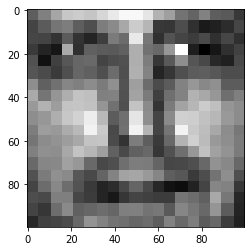

Filter on test image


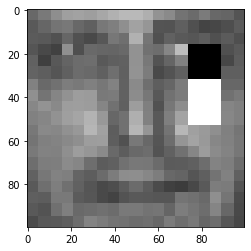

In [4]:
print_filter_image(weak_classifiers_t1[0])

### Adaboost T=3

In [59]:
import time

start_time = time.time()
weak_classifiers_t3 = train(train_X, train_Y, 3, all_features, skip_chance=-1)
end_time = time.time()
print('time to execute 3 round: %f s' % (end_time - start_time))
pickle_it(weak_classifiers_t3, 'weak_classifiers_t3')

Tranining Adaboost
Round: (1/3)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (2/3)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (3/3)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 3000

##### Performance

In [38]:
print('Performance on Train Data, T=3')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t3)
print('')
print('Performance on Test Data, T=3')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t3)

Performance on Train Data, T=3
Evaluation:
accuracy: 0.875550, false positive rate: 0.105642 false negative rate: 0.018808

Performance on Test Data, T=3
Evaluation:
accuracy: 0.842701, false positive rate: 0.038011 false negative rate: 0.119288


In [37]:
print('Classifiers for round: 3')
pickle_it(weak_classifiers_t3, 'weak_classifiers_t3')
for wc in weak_classifiers_t3:
    print(wc)

Classifiers for round: 3
WeakClassifier(polarity=1, threshold=-182.0, alpha=1.6762838449232742, classifier=Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15890)
WeakClassifier(polarity=1, threshold=-9.0, alpha=1.1452467923505691, classifier=Feature(type='Two Vertical', x=5, y=14, width=1, height=4, coords_x=[5, 6, 5, 6, 5, 6, 5, 6], coords_y=[14, 14, 16, 16, 16, 16, 18, 18], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=8827)
WeakClassifier(polarity=1, threshold=-45.0, alpha=1.1397507878072382, classifier=Feature(type='Two Horizontal', x=10, y=1, width=2, height=3, coords_x=[10, 11, 10, 11, 11, 12, 11, 12], coords_y=[1, 1, 4, 4, 1, 1, 4, 4], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=30478)


Test Image


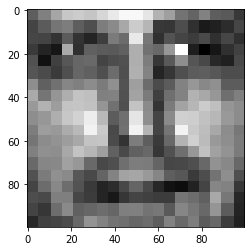

Filter on test image


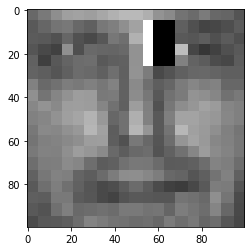

In [11]:
print_filter_image(weak_classifiers_t3[2].classifier)

### Adaboost T=5

In [60]:
import time

start_time = time.time()
weak_classifiers_t5 = train(train_X, train_Y, 5, all_features, skip_chance=-1)
end_time = time.time()
print('time to execute 5 round: %f s' % (end_time - start_time))
pickle_it(weak_classifiers_t5, 'weak_classifiers_t5')

Tranining Adaboost
Round: (1/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (2/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (3/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 3000

##### Performance

In [33]:
print('Performance on Train Data, T=5')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t5)
print('')
print('Performance on Test Data, T=5')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t5)

Performance on Train Data, T=5
Evaluation:
accuracy: 0.908764, false positive rate: 0.076431 false negative rate: 0.014806

Performance on Test Data, T=5
Evaluation:
accuracy: 0.841488, false positive rate: 0.016175 false negative rate: 0.142337


In [34]:
print('Classifiers for round: 5')
pickle_it(weak_classifiers_t5, 'weak_classifiers_t5')
for i,wc in enumerate(weak_classifiers_t5):
    print(wc)

Classifiers for round: 5
WeakClassifier(polarity=1, threshold=-182.0, alpha=1.6762838449232742, classifier=Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15890)
WeakClassifier(polarity=1, threshold=-9.0, alpha=1.1452467923505691, classifier=Feature(type='Two Vertical', x=5, y=14, width=1, height=4, coords_x=[5, 6, 5, 6, 5, 6, 5, 6], coords_y=[14, 14, 16, 16, 16, 16, 18, 18], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=8827)
WeakClassifier(polarity=1, threshold=-45.0, alpha=1.1397507878072382, classifier=Feature(type='Two Horizontal', x=10, y=1, width=2, height=3, coords_x=[10, 11, 10, 11, 11, 12, 11, 12], coords_y=[1, 1, 4, 4, 1, 1, 4, 4], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=30478)
WeakClassifier(polarity=1, threshold=-48.0, alpha=1.0287179804958346, classifier=Feature(type='Two Vertical', x=7, y=11, width=6, height=2, coords_x=[7, 13, 7

Test Image


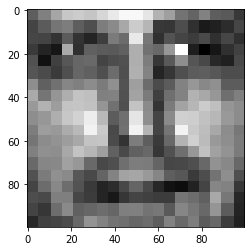

Filter on test image


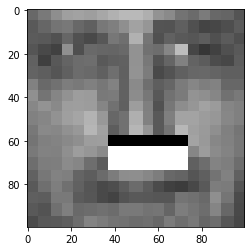

In [17]:
print_filter_image(weak_classifiers_t5[3].classifier)

### Adaboost T=10

In [61]:
import time

start_time = time.time()
weak_classifiers_t10 = train(train_X, train_Y, 10, all_features, skip_chance=-1)
end_time = time.time()
print('time to execute 10 round: %f s' % (end_time - start_time))
pickle_it(weak_classifiers_t10, 'weak_classifiers_t10')

Tranining Adaboost
Round: (1/10)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (2/10)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 
Round: (3/10)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 3

##### Performance

In [26]:
print('Performance on Train Data, T=10')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t10)
print('')
print('Performance on Test Data, T=10')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t10)

Performance on Train Data, T=10
Evaluation:
accuracy: 0.936375, false positive rate: 0.051220 false negative rate: 0.012405

Performance on Test Data, T=10
Evaluation:
accuracy: 0.837849, false positive rate: 0.014153 false negative rate: 0.147998


In [35]:
print('Classifiers for round: 10')
pickle_it(weak_classifiers_t10, 'weak_classifiers_t10')
for i,wc in enumerate(weak_classifiers_t10):
    print(wc)

Classifiers for round: 10
WeakClassifier(polarity=1, threshold=-182.0, alpha=1.6762838449232742, classifier=Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15890)
WeakClassifier(polarity=1, threshold=-9.0, alpha=1.1452467923505691, classifier=Feature(type='Two Vertical', x=5, y=14, width=1, height=4, coords_x=[5, 6, 5, 6, 5, 6, 5, 6], coords_y=[14, 14, 16, 16, 16, 16, 18, 18], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=8827)
WeakClassifier(polarity=1, threshold=-45.0, alpha=1.1397507878072382, classifier=Feature(type='Two Horizontal', x=10, y=1, width=2, height=3, coords_x=[10, 11, 10, 11, 11, 12, 11, 12], coords_y=[1, 1, 4, 4, 1, 1, 4, 4], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=30478)
WeakClassifier(polarity=1, threshold=-48.0, alpha=1.0287179804958346, classifier=Feature(type='Two Vertical', x=7, y=11, width=6, height=2, coords_x=[7, 13, 

Test Image


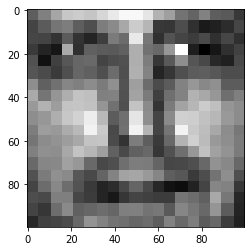

Filter on test image


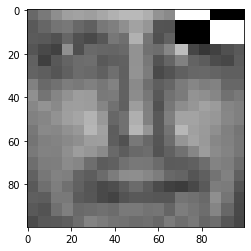

In [21]:
print_filter_image(weak_classifiers_t10[7].classifier)

#### Train
Run all 3 blocks in this subsection

In [61]:
from collections import namedtuple
import sys

ClassifierResult = namedtuple('ClassifierResult', 'feature position polarity threshold classification_error')
WeakClassifier = namedtuple('WeakClassifier', 'polarity threshold alpha classifier position')

'''
T: Number of rounds of Adaboost
'''
def train(train_X, train_Y, T, features, weights =None, skip_chance =0.50):
    print('Tranining Adaboost')
    if weights is None:
        # first round of Adaboost
        faces = len(train_Y[train_Y > 0.5])
        non_faces = len(train_Y[train_Y < 0.5])

        weights = np.zeros(train_Y.shape)
        weights[train_Y > 0.5] = 1.0/(2*faces)
        weights[train_Y < 0.5] = 1.0/(2*non_faces)

    weak_classifiers = []
    for t in range(T):
        print('Round: (%d/%d)' % (t+1, T))
        weights = weights / weights.sum()
        # best weak classifier for this round
        best = ClassifierResult(feature=None, position=0, polarity=0, threshold=0, classification_error=float('inf'))
        processed = 1
        print('processed:', end=' ')
        for i,f in enumerate(features):
            if np.random.random() < skip_chance:
                continue
            result = apply_feature(f, i, train_X[:,i], train_Y, weights)
            if result.classification_error < best.classification_error:
                    best = result
                    
            processed += 1
            if processed % 1000 == 0:
                print(processed, end=' ')
        print('')
        # After the best classifier was found, determine alpha
        # add some value to classification error to avoid divide by zero
        try:
            beta = best.classification_error / (1 - best.classification_error)
            alpha = np.log((1. / best.classification_error) - 1.)
        except AttributeError as e:
            print('Best.classification_error: %s\n%s' % (best.classification_error,e))
            sys.exit(0)
        
        # Build the weak classifier
        classifier = WeakClassifier(threshold=best.threshold, polarity=best.polarity, classifier=best.feature, position=best.position, alpha=alpha)
        
        # Update the weights for misclassified examples
        for i, (fx, y) in enumerate(zip(train_X[:,classifier.position], train_Y)):
            h = weak_classifier(fx, classifier.polarity, classifier.threshold)
            e = np.abs(h - y)
            weights[i] = weights[i] * np.power(beta, 1-e)
            
        # Register this weak classifier           
        weak_classifiers.append(classifier)
        
    return weak_classifiers

In [107]:
# train_fX corresponds to values of this 'feature'
def apply_feature(feature, position, train_fX, train_Y, weights):
    threshold, polarity = determine_threshold_polarity(train_fX, train_Y, weights)
    
    # Determine the classification error
    H = np_weak_classifier(train_fX, polarity, threshold)
    '''
    labels: 
    1 -> false positive
    0 -> true positive or true negative, predicted == true
    -1 -> false negative
    '''
    labels = H - train_Y
    error = np.sum(weights[labels==1]) + np.sum(weights[labels==-1])
            
    return ClassifierResult(threshold=threshold, polarity=polarity, 
                            classification_error=error, feature=feature, position=position)
    
def determine_threshold_polarity(train_fX, train_Y, weights):  
    # Sort according to score
    p = np.argsort(train_fX)
    tain_fX, tain_Y, weights = train_fX[p], train_Y[p], weights[p]
    
    # Determine the best threshold: build running sums
    t_minus, t_plus, s_minuses, s_pluses = build_running_sums(train_Y, weights)
    
    # Determine the best threshold: select optimal threshold.
    return find_best_threshold(train_fX, t_minus, t_plus, s_minuses, s_pluses)

def build_running_sums(train_Y, weights):
    s_minus, s_plus = 0., 0.
    t_minus, t_plus = 0., 0.
    s_minuses, s_pluses = [], []
    
    for y, w in zip(train_Y, weights):
        if y < .5:
            s_minus += w
            t_minus += w
        else:
            s_plus += w
            t_plus += w
        s_minuses.append(s_minus)
        s_pluses.append(s_plus)
    return t_minus, t_plus, s_minuses, s_pluses

def find_best_threshold(train_fX, t_minus, t_plus, s_minuses, s_pluses):
    min_e = float('inf')
    threshold, polarity = 0, 0
    for fx, s_m, s_p in zip(train_fX, s_minuses, s_pluses):
        error_1 = s_p + (t_minus - s_m)
        error_2 = s_m + (t_plus - s_p)
        if error_1 < min_e:
            min_e = error_1
            threshold = fx
            polarity = -1
        elif error_2 < min_e:
            min_e = error_2
            threshold = fx
            polarity = 1
    return threshold, polarity

def weak_classifier(fx, polarity, threshold):
    return 1 if polarity*fx < polarity*threshold else 0

def np_weak_classifier(train_fX, polarity, threshold):
    return (np.sign((polarity * threshold) - (polarity * train_fX)) + 1)//2

def np_strong_classifier(train_X, weak_classifiers):
    num_samples = train_X.shape[0]
    sum_hypothesis = np.zeros(num_samples)
    sum_alphas = np.zeros(num_samples)
    for c in weak_classifiers:
        sum_hypothesis += c.alpha * np_weak_classifier(train_X[:, c.position], c.polarity, c.threshold)
        sum_alphas += c.alpha
        
    return (np.sign(sum_hypothesis - 0.5*sum_alphas) + 1)//2

In [23]:
import pickle

def pickle_it(data, filename):
    pickle_file = open(filename,'wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

def unpickle_it(filename):
    pickle_file = open(filename,'rb')
    data = pickle.load(pickle_file)
    pickle_file.close()
    return data

#### Test

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

PredictionStats = namedtuple('PredictionStats', 'accuracy fp_rate fn_rate')

def test_weak_classifier(test_X, test_Y, w_classifier):
    pred_Y = np.array([weak_classifier(fx, w_classifier.polarity, w_classifier.threshold) for fx in test_X[:,w_classifier.position]])
    cm = confusion_matrix(test_Y, pred_Y)
    tn, fp, fn, tp = cm.ravel()
    num_samples = test_Y.shape[0]
    false_positive_rate = (fp*1.0)/num_samples
    false_negative_rate = (fn*1.0)/num_samples
    accuracy = accuracy_score(test_Y, pred_Y)
    print('Evaluation:\naccuracy: %f, false positive rate: %f false negative rate: %f' % (accuracy, false_positive_rate, false_negative_rate))
    return PredictionStats(accuracy, false_positive_rate, false_negative_rate)

def test_strong_classifier(test_X, test_Y, weak_classifiers):
    pred_Y = np_strong_classifier(test_X, weak_classifiers)
    cm = confusion_matrix(test_Y, pred_Y)
    tn, fp, fn, tp = cm.ravel()
    num_samples = test_Y.shape[0]
    false_positive_rate = (fp*1.0)/num_samples
    false_negative_rate = (fn*1.0)/num_samples
    accuracy = accuracy_score(test_Y, pred_Y)
    print('Evaluation:\naccuracy: %f, false positive rate: %f false negative rate: %f' % (accuracy, false_positive_rate, false_negative_rate))
    return PredictionStats(accuracy, false_positive_rate, false_negative_rate)

##### Print Image

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# pim_classifier = Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1])

def print_filter_image(classifier):
    coords_x = classifier.coords_x
    coords_y = classifier.coords_y
    coeffs = classifier.coeffs
    im = Image.open('dataset/trainset/faces/face00001.png')
    np_im = np.array(im)
    print('Test Image')
    im = Image.fromarray(np_im).resize((100, 100))
    plt.imshow(im, cmap='gray')
    plt.show()
    
    filtered_im = np_im.copy()
    i=0
    while i < len(coeffs):
        if coeffs[i:i+4] == [1, -1, -1, 1]:
            filtered_im = paint_it(filtered_im, coords_x[i:i+4], coords_y[i:i+4], gray=True)
        else:
            filtered_im = paint_it(filtered_im, coords_x[i:i+4], coords_y[i:i+4], gray=False)
        i = i+4
    print('Filter on test image')
    filtered_im = Image.fromarray(filtered_im).resize((100, 100))
    plt.imshow(filtered_im, cmap='gray')
    plt.show()
    
'''
Rectangle as represented in coords_x, coords_y
        width
       0----1
       |    |
height |    |
       2----3
'''
def paint_it(np_im, coords_x, coords_y, gray=True):
    # height = coords_y[2] - coords_y[0]
    color = 0 if gray else 255
    np_im[coords_y[0]:coords_y[2]+1, coords_x[0]:coords_x[1]+1,] = color
    return np_im


## 2.3 (30 Points) Adjust the thresholds

### Criterion: False Positive

Run **Train** blocks before executing below code.

In [69]:
import time
import numpy as np

# train_X = np.load('train-X', allow_pickle=True)
# train_Y = np.load('train-Y', allow_pickle=True)
# test_X = np.load('test-X', allow_pickle=True)
# test_Y = np.load('test-Y', allow_pickle=True)

start_time = time.time()
weak_classifiers_t5 = train(train_X, train_Y, 5, all_features)
end_time = time.time()
print('time to execute 5 round: %f s' % (end_time - start_time))

Tranining Adaboost
Round: (1/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (2/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (3/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 
Round: (4/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 
Round: (5/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25

In [78]:
print('Performance on Train Data, T=5')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t5)
print('')
print('Performance on Test Data, T=5')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t5)

Performance on Train Data, T=5
Evaluation:
accuracy: 0.921168, false positive rate: 0.032013 false negative rate: 0.046819

Performance on Test Data, T=5
Evaluation:
accuracy: 0.818035, false positive rate: 0.007683 false negative rate: 0.174282


In [79]:
print('Classifiers for round: 5')
pickle_it(weak_classifiers_t5, 'fp_weak_classifiers_t5')
for i,wc in enumerate(weak_classifiers_t5):
    print(wc)

Classifiers for round: 5
WeakClassifier(polarity=1, threshold=-122.0, alpha=1.5361325177594782, classifier=Feature(type='Two Vertical', x=5, y=15, width=11, height=2, coords_x=[5, 16, 5, 16, 5, 16, 5, 16], coords_y=[15, 15, 16, 16, 16, 16, 17, 17], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=8874)
WeakClassifier(polarity=1, threshold=-544.0, alpha=1.5782646249141685, classifier=Feature(type='Two Vertical', x=13, y=3, width=5, height=6, coords_x=[13, 18, 13, 18, 13, 18, 13, 18], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15400)
WeakClassifier(polarity=1, threshold=-21.0, alpha=1.4236621818994253, classifier=Feature(type='Two Horizontal', x=5, y=6, width=2, height=3, coords_x=[5, 6, 5, 6, 6, 7, 6, 7], coords_y=[6, 6, 9, 9, 6, 6, 9, 9], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=25585)
WeakClassifier(polarity=1, threshold=-175.0, alpha=1.4345641091513004, classifier=Feature(type='Four', x=10, y=3, width=2, height=16, coords_x=[10, 11, 10, 11, 

##### Train

In [68]:
# train_fX corresponds to values of this 'feature'
def apply_feature(feature, position, train_fX, train_Y, weights):
    threshold, polarity = determine_threshold_polarity(train_fX, train_Y, weights)
    
    # Determine the classification error, more sensitive to false positives
    H = np_weak_classifier(train_fX, polarity, threshold)
    '''
    labels: 
    1 -> false positive
    0 -> true positive or true negative, predicted == true
    -1 -> false negative
    '''
    labels = H - train_Y
    fp_err = np.sum(weights[labels==1])
    fn_err = np.sum(weights[labels==-1])
    error = 0.8*fp_err + 0.2*fn_err
            
    return ClassifierResult(threshold=threshold, polarity=polarity, 
                            classification_error=error+0.1, feature=feature, position=position)

### Criterion: False Negative

Run **Train** blocks before executing below code.

In [73]:
import time
import numpy as np

start_time = time.time()
weak_classifiers_t5 = train(train_X, train_Y, 5, all_features)
end_time = time.time()
print('time to execute 5 round: %f s' % (end_time - start_time))

Tranining Adaboost
Round: (1/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 
Round: (2/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (3/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (4/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (5/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26

In [74]:
print('Performance on Train Data, T=5')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t5)
print('')
print('Performance on Test Data, T=5')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t5)

Performance on Train Data, T=5
Evaluation:
accuracy: 0.869548, false positive rate: 0.121248 false negative rate: 0.009204

Performance on Test Data, T=5
Evaluation:
accuracy: 0.855237, false positive rate: 0.028710 false negative rate: 0.116053


In [76]:
print('Classifiers for round: 5')
pickle_it(weak_classifiers_t5, 'fn_weak_classifiers_t5')
for i,wc in enumerate(weak_classifiers_t5):
    print(wc)

Classifiers for round: 5
WeakClassifier(polarity=1, threshold=-123.0, alpha=1.6810649078663096, classifier=Feature(type='Two Vertical', x=14, y=4, width=4, height=4, coords_x=[14, 18, 14, 18, 14, 18, 14, 18], coords_y=[4, 4, 6, 6, 6, 6, 8, 8], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15942)
WeakClassifier(polarity=1, threshold=-8.0, alpha=1.5082054352909342, classifier=Feature(type='Two Horizontal', x=10, y=2, width=2, height=1, coords_x=[10, 11, 10, 11, 11, 12, 11, 12], coords_y=[2, 2, 3, 3, 2, 2, 3, 3], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=30548)
WeakClassifier(polarity=1, threshold=-10.0, alpha=1.4401225852941009, classifier=Feature(type='Two Vertical', x=12, y=15, width=1, height=4, coords_x=[12, 13, 12, 13, 12, 13, 12, 13], coords_y=[15, 15, 17, 17, 17, 17, 19, 19], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15183)
WeakClassifier(polarity=1, threshold=-8.0, alpha=1.4738424046525616, classifier=Feature(type='Two Horizontal', x=5, y=8, width=2, height=1, coords_x

##### Train

In [72]:
# train_fX corresponds to values of this 'feature'
def apply_feature(feature, position, train_fX, train_Y, weights):
    threshold, polarity = determine_threshold_polarity(train_fX, train_Y, weights)
    
    # Determine the classification error, more sensitive to false positives
    H = np_weak_classifier(train_fX, polarity, threshold)
    '''
    labels: 
    1 -> false positive
    0 -> true positive or true negative, predicted == true
    -1 -> false negative
    '''
    labels = H - train_Y
    fp_err = np.sum(weights[labels==1])
    fn_err = np.sum(weights[labels==-1])
    error = 0.2*fp_err + 0.8*fn_err
            
    return ClassifierResult(threshold=threshold, polarity=polarity, 
                            classification_error=error+0.1, feature=feature, position=position)

## 2.4.1 (20 Points) Build the Cascading system:

#### Cascade Adaboost, T = 30

##### Train

In [123]:
import time
import numpy as np

# train_X = np.load('train-X', allow_pickle=True)
# train_Y = np.load('train-Y', allow_pickle=True)
# test_X = np.load('test-X', allow_pickle=True)
# test_Y = np.load('test-Y', allow_pickle=True)
start_time = time.time()

cascade_rounds = [5,5,10,10]
# true positives, faces, Y=1
TP_Y = train_Y[train_Y > 0.5]
TP_X = train_X[train_Y > 0.5,:]
# true negatives, non-faces, Y=0
TF_Y = train_Y[train_Y < 0.5]
TF_X = train_X[train_Y < 0.5,:]

weak_classifiers_cs = []
for T in cascade_rounds:
    tt_X = np.append(TP_X, TF_X, axis=0)
    tt_Y = np.append(TP_Y, TF_Y)
    if (len(tt_Y[tt_Y < 0.5]) == 0):
        print('The detector has discarded all non faces, cascading classifiers are ready.')
        break
        
    print('Input shape for %d round detector: %s' % (T, str(tt_X.shape)))
    weak_classifiers = train(tt_X, tt_Y, T, all_features)
    weak_classifiers_cs.append(weak_classifiers)
    # predicted values
    pred_TF_Y = np_strong_classifier(TF_X, weak_classifiers)
    # discard the non faces from TF
    # add back those images which are predicted as faces
    print('Image discarded after %d round detector: %d' % (T, TF_Y[pred_TF_Y < 0.5].shape[0]))
    TF_Y = TF_Y[pred_TF_Y > 0.5]
    TF_X = TF_X[pred_TF_Y > 0.5,:]


end_time = time.time()
print('time to execute 30 rounds: %f s' % (end_time - start_time))
    

Input shape for 5 round detector: (2499, 63960)
Tranining Adaboost
Round: (1/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (2/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (3/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 
Round: (4/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (5/5)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18

##### Test

In [137]:
print('Performance on Train Data:')
eval_cascade_classifiers(weak_classifiers_cs, train_X, train_Y)
print('')
print('Performance on Test Data:')
eval_cascade_classifiers(weak_classifiers_cs, test_X, test_Y)

Performance on Train Data:
Evaluation:
accuracy: 0.948780, false positive rate: 0.000000 false negative rate: 0.051220

Performance on Test Data:
Evaluation:
accuracy: 0.816822, false positive rate: 0.002831 false negative rate: 0.180348


In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def eval_cascade_classifiers(weak_classifiers_cs, test_X, test_Y):
    tt_X = test_X
    tt_Y = test_Y
    pred_Y = np.ones(tt_Y.shape)
    for wc in weak_classifiers_cs:
        for i in range(pred_Y.shape[0]):
            # only check if earlier prediction for the image is a face
            # discard if earlier prediction is non-face
            if pred_Y[i]>0.5:
                if len(wc) > 1:
                    pred_Y[i] = np_strong_classifier(tt_X[i:i+1,:], wc)[0]
                else:
                    pred_Y[i] = weak_classifier(tt_X[i,wc[0].position], wc[0].polarity, wc[0].threshold)

    cm = confusion_matrix(test_Y, pred_Y)
    tn, fp, fn, tp = cm.ravel()
    num_samples = test_Y.shape[0]
    false_positive_rate = (fp*1.0)/num_samples
    false_negative_rate = (fn*1.0)/num_samples
    accuracy = accuracy_score(test_Y, pred_Y)
    print('Evaluation:\naccuracy: %f, false positive rate: %f false negative rate: %f' % (accuracy, false_positive_rate, false_negative_rate))
        

#### Regular Adaboost, T = 30

In [125]:
import time
import numpy as np

train_X = np.load('train-X', allow_pickle=True)
train_Y = np.load('train-Y', allow_pickle=True)
test_X = np.load('test-X', allow_pickle=True)
test_Y = np.load('test-Y', allow_pickle=True)

start_time = time.time()
weak_classifiers_t30 = train(train_X, train_Y, 30, all_features)
end_time = time.time()
print('time to execute 30 rounds: %f s' % (end_time - start_time))

Tranining Adaboost
Round: (1/30)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (2/30)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (3/30)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 
Round: (4/30)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 
Round: (5/30)
processed: 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 250

In [126]:
print('Performance on Train Data, T=30')
pred_stats = test_strong_classifier(train_X, train_Y, weak_classifiers_t30)
print('')
print('Performance on Test Data, T=30')
pred_stats = test_strong_classifier(test_X, test_Y, weak_classifiers_t30)

Performance on Train Data, T=30
Evaluation:
accuracy: 0.938375, false positive rate: 0.050420 false negative rate: 0.011204

Performance on Test Data, T=30
Evaluation:
accuracy: 0.839062, false positive rate: 0.013344 false negative rate: 0.147594


In [127]:
print('Classifiers for round: 30')
pickle_it(weak_classifiers_t30, 'weak_classifiers_t30')
for wc in weak_classifiers_t30:
    print(wc)

Classifiers for round: 30
WeakClassifier(polarity=1, threshold=-182.0, alpha=1.6762838449232749, classifier=Feature(type='Two Vertical', x=14, y=3, width=2, height=6, coords_x=[14, 16, 14, 16, 14, 16, 14, 16], coords_y=[3, 3, 6, 6, 6, 6, 9, 9], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=15890)
WeakClassifier(polarity=1, threshold=-9.0, alpha=1.145246792350553, classifier=Feature(type='Two Vertical', x=5, y=14, width=1, height=4, coords_x=[5, 6, 5, 6, 5, 6, 5, 6], coords_y=[14, 14, 16, 16, 16, 16, 18, 18], coeffs=[1, -1, -1, 1, -1, 1, 1, -1]), position=8827)
WeakClassifier(polarity=1, threshold=-41.0, alpha=1.1311753735014036, classifier=Feature(type='Two Horizontal', x=10, y=0, width=2, height=4, coords_x=[10, 11, 10, 11, 11, 12, 11, 12], coords_y=[0, 0, 4, 4, 0, 0, 4, 4], coeffs=[-1, 1, 1, -1, 1, -1, -1, 1]), position=30403)
WeakClassifier(polarity=1, threshold=-54.0, alpha=1.0066408458663105, classifier=Feature(type='Two Vertical', x=6, y=11, width=7, height=2, coords_x=[6, 13, 6